# Sprawozdanie z Projektu nr. 1

Projekt obejmuje tematy porządkowania liniowego, analizy skupień oraz skalowania wielowymiarowego. <br />
Został wykonany na próbce wybranych pokemonów ze wstępnie obrobionego zbioru danych: https://www.kaggle.com/abcsds/pokemon <br />

Celem pracy jest przede wszystkim utworzenie rankingu najlepszych pokemonów (z tych dostępnych w danych) oraz wykonanie analizy skupień, która będzie zaprezentowana na dwuwymiarowej wizualizacji.



Wykorzystane zmienne ze zbioru danych:
- Name - Nazwa pokemona
- HP - Życie określa ile obrażeń Pokemon może otrzymać zanim odpadnie z walki
- Attack - Atak zwiększa obrażenia, jakie Pokemon zadaje ruchami fizycznymi
- Defense - Obrona zmniejsza obrażenia jakie Pokemon będzie otrzymywał ruchami fizycznymi
- Sp. Atk - Specjalny Atak zwiększa obrażenia, jakie Pokemon zadaje ruchami specjalnymi
- Sp. Def - Specjalna Obrona zmniejsza obrażenia jakie Pokemon będzie otrzymywał ruchami specjalnymi
- Speed - Szybkość, Pokemon z wyższą szybkością na początku rundy walki zaatakuje jako pierwszy i dodatkowo wpływa na uniki i celność

## Praca na zbiorze danych



In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
# reading csv file and setting index
df = pd.read_csv('poksy.csv', index_col='Name')
# printing data
df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,45,49,49,65,65,45
Ivysaur,60,62,63,80,80,60
Venusaur,80,82,83,100,100,80
Charmander,39,52,43,60,50,65
Charmeleon,58,64,58,80,65,80
Charizard,78,84,78,109,85,100
Squirtle,44,48,65,50,64,43
Wartortle,59,63,80,65,80,58
Blastoise,79,83,100,85,105,78


In [3]:
# basic statistics
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,61.181818,63.363636,58.022727,58.454545,60.090909,64.409091
std,21.943132,20.122983,19.600058,23.908211,22.788020,22.386996
min,30.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,45.000000,47.750000,42.250000,40.000000,40.000000,45.000000
50%,60.000000,62.000000,55.000000,57.500000,64.500000,65.000000
75%,73.500000,80.250000,70.750000,80.000000,79.250000,80.000000
max,140.000000,102.000000,110.000000,109.000000,105.000000,110.000000


Dla każdej ze zmiennych zarówno średnia jak i odchylenie standardowe jest na podobnym poziomie - około 60 (średnia) i około 20 (odchylenie). <br />
Do usuwania wartości odstających zastosowano przybliżenie reguły trzech sigm - w tym przypadku wartością graniczną wybrano liczbę 120 i tylko w przypadku zmiennej ***HP*** wartość maksymalna przekraczą tę granicę.

In [4]:
# removing outliers
df = df[df['HP'] <= 120]

In [5]:
# coefficient of variation
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
df.apply(cv)

HP         31.142631
Attack     32.170530
Defense    33.823194
Sp. Atk    41.208212
Sp. Def    38.132830
Speed      34.610359
dtype: float64

Na podstawie poprzednich statystyk opisowych i powyższej kalkulacji współczynnika zmienności widoczna jest informacja, <br />że dla każdej zmiennej przekracza **30%**. Co bardzo dobrze świadczy o istotności danych.

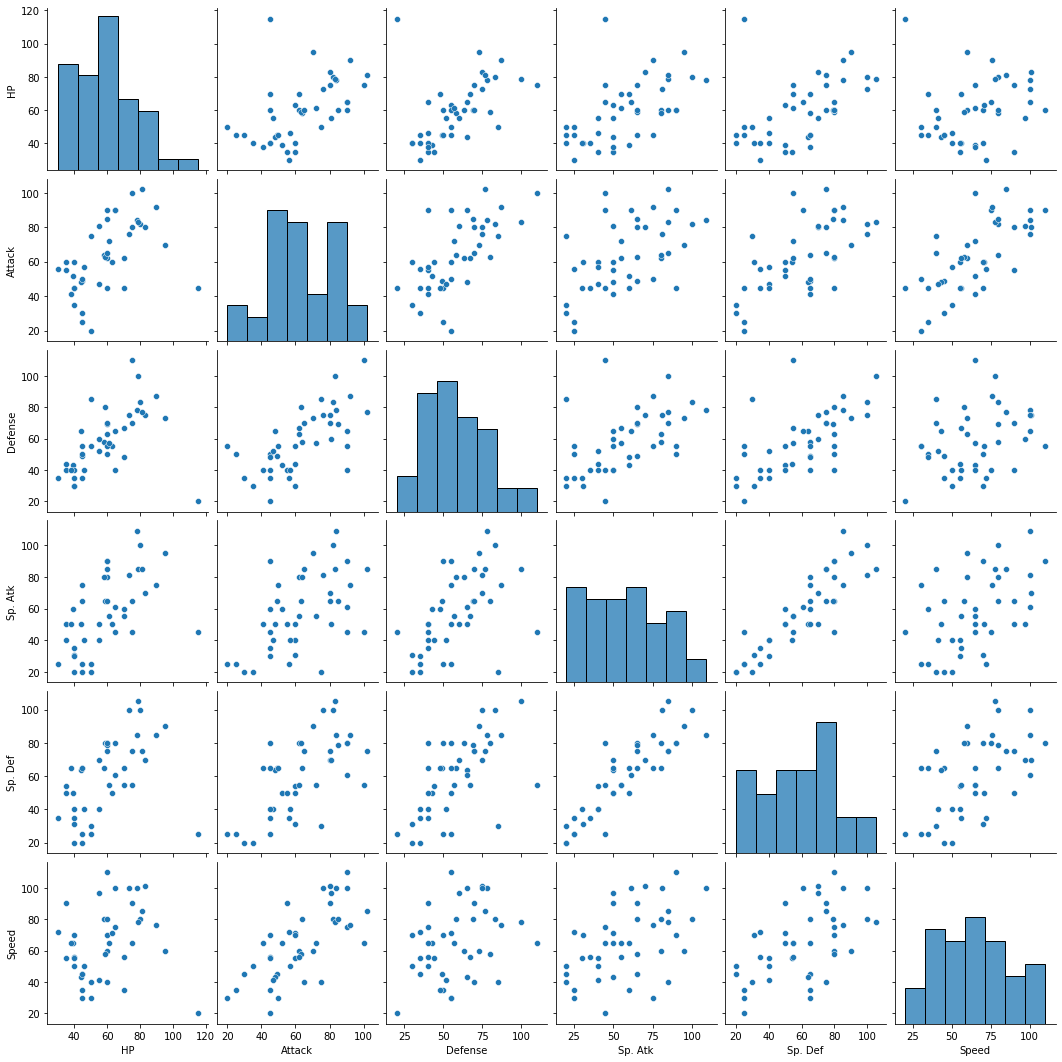

In [6]:
# pairwise relationships in a dataset
sns.pairplot(df) 
plt.show()

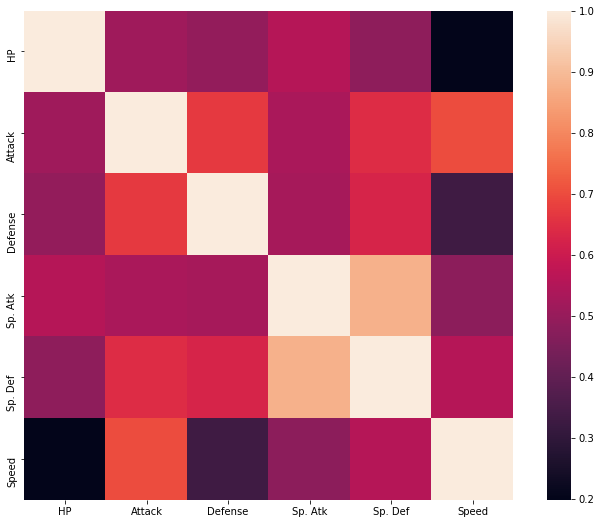

In [7]:
# correlation 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)
plt.show()


Pomiędzy wszystkimi zmiennymi istnieje dodatnia zależność liniowa, a korrelacja oscyluje w okolicach **50-60%**. <br />
Poniżej zaprezentowany został rozkład zmiennych.


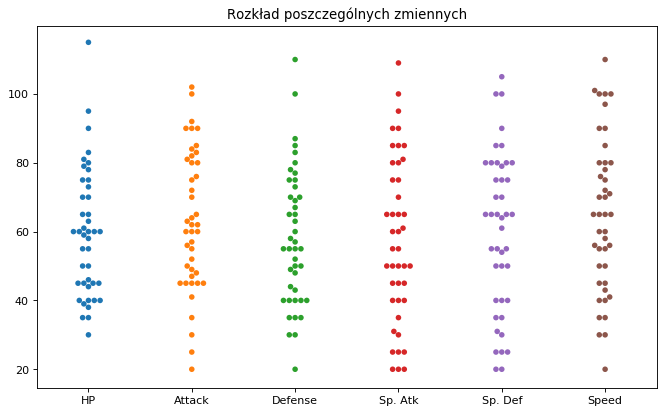

In [8]:
# distribution of features
plt.figure(figsize=(10, 6), dpi=80)
sns.swarmplot(data=df)
plt.title("Rozkład poszczególnych zmiennych")
plt.show()

## Porządkowanie liniowe

**Metoda Hellwiga i TOPSIS** <br />
W przypadku wybranego zbioru danych wszystkie zmienne są stymulantami co oznacza, że im większa wartość tym lepiej. <br />
Z tego powodu badanie porządkowania liniowego rozpocznie się od standaryzacji wartości, a następnie wyliczona zostanie zmienna syntetyczna, od której wartość zależy od wartości cech charakteryzujących nasze obiekty.


In [9]:
# standarization
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df), columns = df.columns, index=df.index)
df_scaled

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,
Bulbasaur,-0.785523,-0.707039,-0.478313,0.304089,0.205606,-0.895185
Ivysaur,0.035648,-0.060173,0.239753,0.940899,0.865388,-0.219079
Venusaur,1.130542,0.935004,1.265560,1.789979,1.745097,0.682395
Charmander,-1.113991,-0.557762,-0.786055,0.091819,-0.454175,0.006289
Charmeleon,-0.073842,0.039344,-0.016699,0.940899,0.205606,0.682395
Charizard,1.021052,1.034521,1.009108,2.172064,1.085315,1.583870
Squirtle,-0.840267,-0.756797,0.342333,-0.332721,0.161621,-0.985333
Wartortle,-0.019097,-0.010415,1.111689,0.304089,0.865388,-0.309227
Blastoise,1.075797,0.984762,2.137497,1.153169,1.965024,0.592248


In [10]:
# creating template with max values
template = df_scaled.max().to_list()
template

[3.046606094063073,
 1.9301806720718704,
 2.6504004353727466,
 2.172064441577101,
 1.9650243443204847,
 2.0346068438558143]

In [11]:
# creating template with difference min - max 
template_topsis = (df_scaled.min() - df_scaled.max()).to_list()
template_topsis

[-4.653299320434823,
 -4.080226048996052,
 -4.6161339715987975,
 -3.778404826325257,
 -3.7387631329991518,
 -4.056634974612057]

In [12]:
# creating distance
df_dist = df_scaled
for j in range(len(template)):
    for i in range(0,len(df_dist)):
        df_dist.iloc[i,j] = (df_dist.iloc[i,j] - template[j]) ** 2
    
df_dist['Distance'] = df_dist.sum(axis=1) ** 0.5

# mean
dist_mean = df_dist['Distance'].mean()
# std
dist_std = df_dist['Distance'].std()
# d0
d0 = dist_mean + 2 * dist_std
# d0 for TOPSIS
topsis_d0 = 0
for val in template_topsis:
    topsis_d0 += val ** 2
topsis_d0 = topsis_d0 ** 0.5

# printing data
df_dist

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Distance
Name,,,,,,,
Bulbasaur,14.685212,6.954926,9.788845,3.489332,3.095552,8.583681,6.826240
Ivysaur,9.065870,3.961510,5.811223,1.515769,1.209200,5.079101,5.161654
Venusaur,3.671303,0.990377,1.917782,0.145990,0.048368,1.828476,2.932967
Charmander,17.310568,6.189859,11.809225,4.327421,5.852527,4.114072,7.042987
Charmeleon,9.737194,3.575263,7.113420,1.515769,3.095552,1.828476,5.183211
Charizard,4.102868,0.802206,2.693840,0.000000,0.773888,0.203164,2.928475
Squirtle,15.107786,7.219851,5.327173,6.273949,3.252264,9.120034,6.804488
Wartortle,9.398535,3.765910,2.367633,3.489332,1.209200,5.493556,5.071900
Blastoise,3.884089,0.893816,0.263070,1.038148,0.000000,2.080400,2.856488


In [13]:
# printing values of mean, std and d0 for both methods
dist_mean, dist_std, d0, topsis_d0

(5.946020938031963, 1.8645435299129496, 9.675107997857863, 10.213770710845775)

In [14]:
# creating Hellwig and topsis metrics
ranking = df_dist[[]]
ranking['Hellwig'] = 1-(df_dist['Distance']/d0)
ranking['TOPSIS'] = 1-(df_dist['Distance']/topsis_d0)
# best 10 pokemons by metrics
ranking.sort_values(by='Hellwig', ascending=False).head(10)

,Hellwig,TOPSIS
Name,,
Blastoise,0.704759,0.720330
Charizard,0.697319,0.713282
Venusaur,0.696854,0.712842
Nidoqueen,0.694817,0.710912
Nidoking,0.667025,0.684586
Ninetales,0.644238,0.663001
Pidgeot,0.630709,0.650185
Clefable,0.624435,0.644242
Golbat,0.583403,0.605374


W przypadku obydwóch metod na podium uplasowały się kolejno:
- Blastoise
- Charizard
- Venusaur

**Najmocniejszymi pokemonami są ewolucje pokemonów startowych, dlatego każdy trener powinien je mieć w swojej kolekcji. <br /> Pomijając aspekty żywiołów najlepszym wyborem na pokemona startowego jest podstawowa wersja Blastoise czyli Squirtle.**

## Analiza skupień

Do wyszukiwania wzorców w danych bez etykiety wykorzystuje się modele uczenia nienadzorowanego. <br />
W przypadku tego projektu zaprezentowane zostało klastrowanie przy użyciu algorytmu KMeans oraz klastrowanie hierarchiczne. <br />
Klastrowanie polega na grupowanie punktów danych na podstawie ich podobnieństwa.

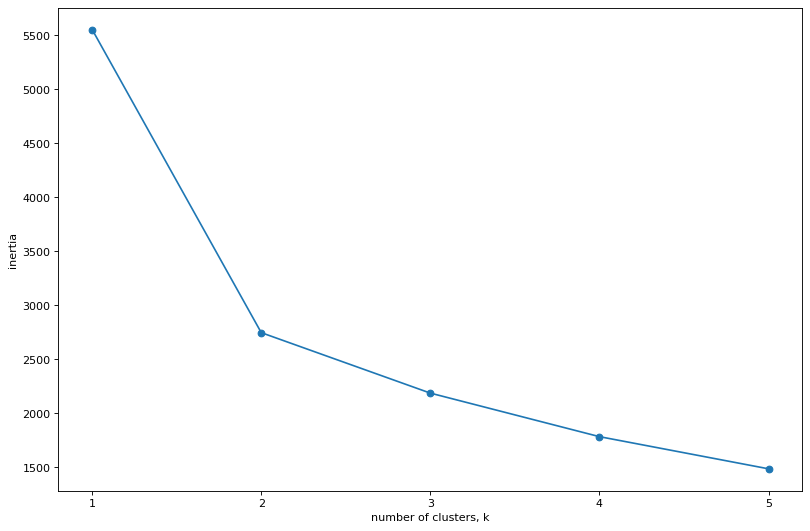

In [15]:
# creating list for looping purposes
ks = range(1, 6)
inertias = []

for k in ks:
    # Creating a KMeans instance with k clusters
    model = KMeans(n_clusters=k)
    
    # Fitting model to data
    model.fit(df_scaled)
    
    # Appending the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plotting ks vs inertias
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()    

Wyświetlony powyżej wykres przydatny jest do wyboru liczby klastrów za pomocą metody łokciowej. *Inertia* (bezwładność) mierzy jak dobrze zestaw został pogrupowany przez KMeans. Jest obliczany poprzez pomiar odległości między każdym punktem danych a jego środkiem ciężkości, podniesienie tej odległości do kwadratu i zsumowanie tych kwadratów w jednym klastrze.

Jednak im więcej grup tym niższa *inertia* dlatego wybór w tym przypadku padł na 2 grupy, ponieważ w kolejnych iteracjach zmiana jest już niewielka.

In [16]:
# Creating a KMeans model with 3 clusters: model
model = KMeans(n_clusters=2)

# Using fit_predict to fit model and obtain cluster labels
labels = model.fit_predict(df_scaled)

# Printing grouped data (scaled values)
df_scaled_res = df_scaled
df_scaled_res['Labels'] = labels
df_scaled_res.sort_values('Labels')

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Distance,Labels
Name,,,,,,,,
Bulbasaur,14.685212,6.954926,9.788845,3.489332,3.095552,8.583681,6.826240,0
Pikachu,19.180684,5.469359,12.890444,6.273949,5.852527,0.812656,7.104901,0
Ekans,19.180684,4.367564,11.459341,8.580945,5.032206,6.145712,7.400436,0
Oddish,14.685212,6.694951,7.957876,2.083506,3.095552,13.002499,6.893446,0
Spearow,16.858023,4.367564,16.836498,10.965443,10.594525,3.250625,7.929229,0
Rattata,21.653195,5.239097,14.797703,12.717318,9.480126,2.933689,8.174419,0
Nidoran♂,14.268631,5.013786,12.890444,8.580945,8.174191,7.313905,7.499460,0
Pidgey,16.858023,8.044341,12.890444,9.869619,9.480126,5.924263,7.941462,0
Nidoran♀,10.789135,7.489729,8.849684,8.580945,8.174191,9.672640,7.318219,0


Aby zwizualizować powyższe wyniki w dalszej części projektu zostanie wykorzystana redukcja wymiarowości.
Jednak w następnej kolejności sprawdzone zostanie grupowanie hierarchiczne, gdzie fukcją odległości jest odległość euklidesowa, a metodą łączenia jest metoda Warda - bazuje na ANOVA i na każdym
etapie minimalizuje ona wzrost łącznej sumy
kwadratów odchyleń wszystkich cech dla każdego
obiektu w obrębie grupy od średnich w skupieniu.

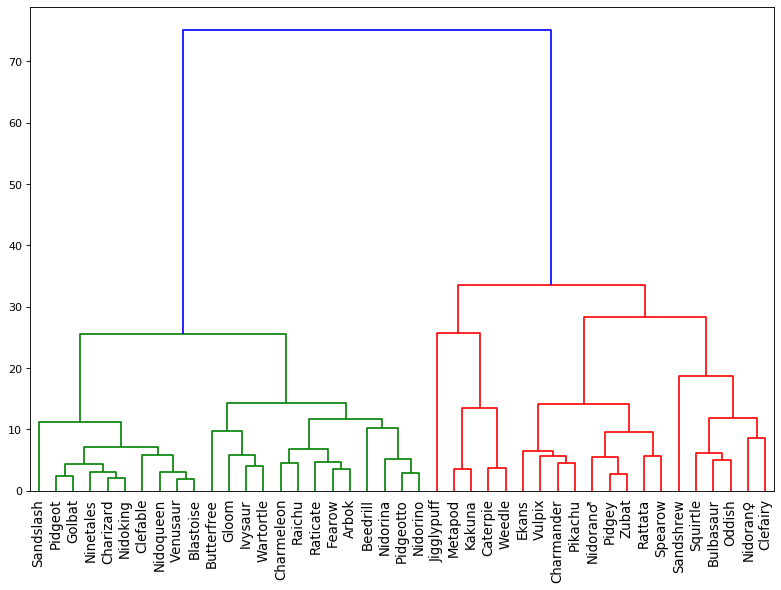

In [17]:
# Calculating the linkage
distance_matrix = linkage(df_scaled, method='ward', metric='euclidean')

# Assigning results to new variable
labels_hierarchy = fcluster(distance_matrix, 2, criterion='maxclust')

# Plotting the dendrogram
plt.figure(figsize=(12, 8), dpi=80)
dendrogram(distance_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.show()

Dendrogramy to świetny sposób na zilustrowanie rozmieszczenia klastrów powstałych w wyniku hierarchicznego grupowania.<br />
Na podstawie powyższego można dojść do wniosku, że wybór podziału na dwie grupy również byłby dobry.

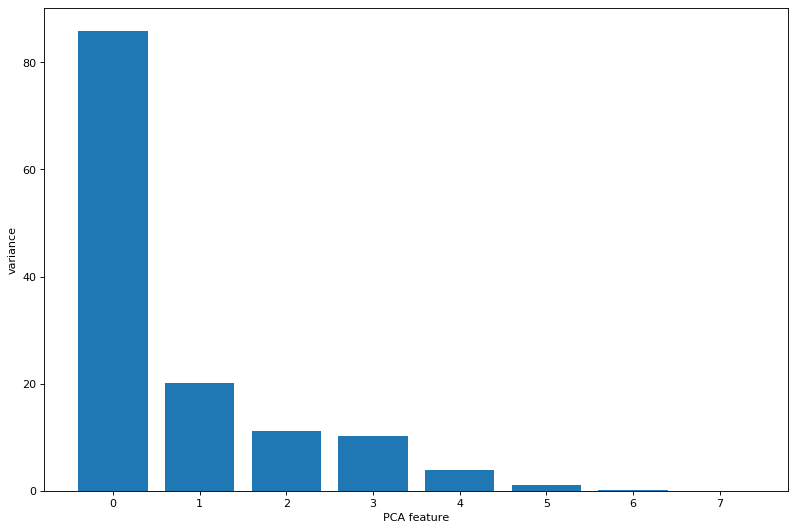

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

# Plotting variances
plt.figure(figsize=(12, 8), dpi=80)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Na podstawie powyższego wykresu można uznać, że dwie zmienne mają większą wariancję od reszty - liczba wymiarów zostanie zredukowana do dwóch, aby móc ją zobrazować.

In [19]:
# Creating PCA with 2 components
pca = PCA(n_components=2)

# Fitting the PCA instance
pca.fit(df_scaled)

# Transforming the scaled data
pca_features = pca.transform(df_scaled)

# Printing the shape of pca_features
print(pca_features.shape)

(43, 2)


Redukcja do wymiarów została zakończona sukcesem. Teraz nastąpi wizualizacja wyników.

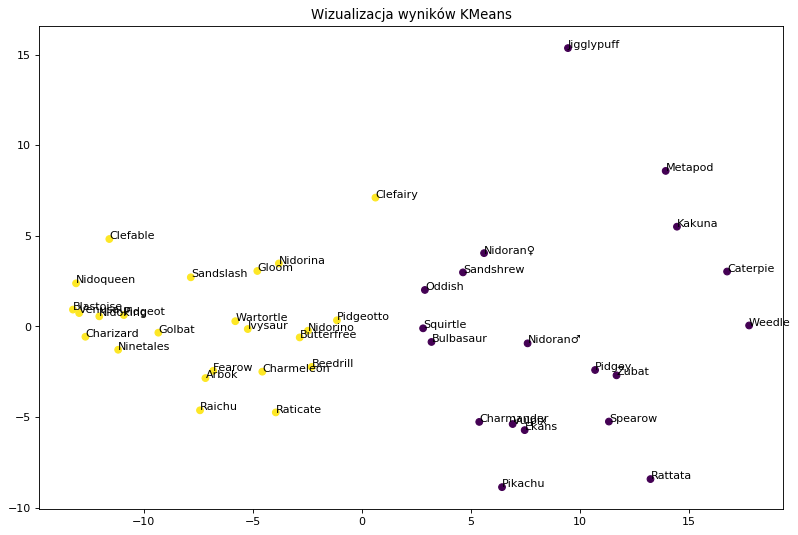

In [20]:
# Creating visualization for clusters
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.scatter(pca_features[:,0], y=pca_features[:,1], c=labels)

# Adding annotations
for i, txt in enumerate(df.index):
    ax.annotate(txt, (pca_features[i,0], pca_features[i,1]))
plt.title('Wizualizacja wyników KMeans')
plt.show()

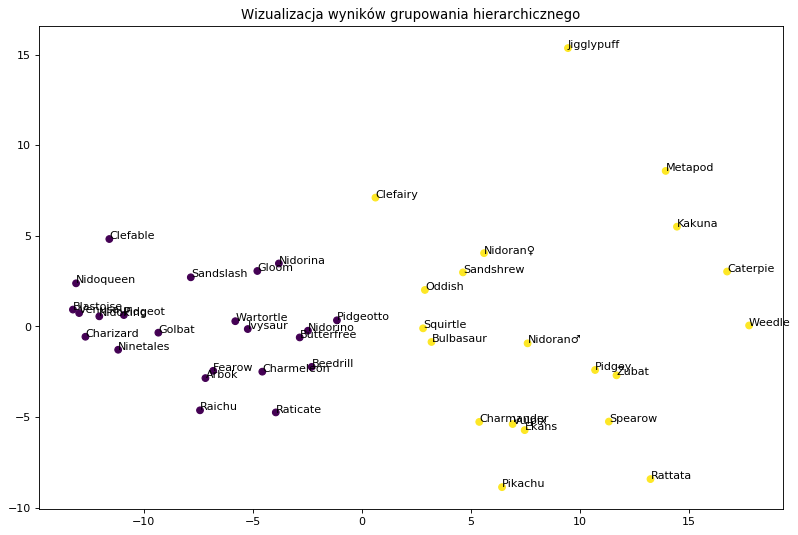

In [21]:
# Creating visualization for clusters
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.scatter(pca_features[:,0], y=pca_features[:,1], c=labels_hierarchy)

# Adding annotations
for i, txt in enumerate(df.index):
    ax.annotate(txt, (pca_features[i,0], pca_features[i,1]))
plt.title('Wizualizacja wyników grupowania hierarchicznego')
plt.show()

Wyniki klastrowania zarówno w przypadku metody K-Średnich oraz grupowania hierarchicznego wskazały tendencję do występowania 2 grup pokemonów, jednak algorytmy miały odmienne zdanie o przynależności do konkretnej grupy pokemona o nazwie **Clefairy**. <br /><br />Grupy można podzielić następująco:
- podstawowe ewolucje i słabsze ewolucje 2 poziomu
- mocniejsze ewolucje 2 poziomu i ewolucje 3 poziomu

W przypadku pierwszej grupy suma dystansu statystyk jest wyższa co świadczy o tym, że te pokemony są po prostu słabsze pod względem konfiguracji wszystkich cech.